In [4]:
%matplotlib notebook
%matplotlib inline

In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [23]:
#Inspect data for missing, malformed, or incorrect data
#.count() gives total rows in each column to check for missing values, .isnull().sum() gives count of all missing rows
city_data_df.count()
city_data_df.isnull().sum()



city            0
driver_count    0
type            0
dtype: int64

In [22]:
#same for ride data
ride_data_df.count()
ride_data_df.isnull().sum()


city       0
date       0
fare       0
ride_id    0
dtype: int64

In [25]:
#check for numerical data in "driver_count" column of city_data_df because we will perform analysis on it
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [29]:
#how many city types are there? use .unique() function
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [35]:
#Count each city type
sum(city_data_df["type"]=="Urban")

66

In [36]:
#Count each city type
sum(city_data_df["type"]=="Suburban")

36

In [37]:
#Count each city type
sum(city_data_df["type"]=="Rural")

18

In [39]:
#Now do that for ride_data_df
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [40]:
#Great, now we can merge the dataframes for better analysis. 
#use new_df = pd.merge(leftdf, rightdf, on=["column_lefdf", "column_rightdf"])
#but if more complicated merge, use how= (options are "left", "right", "inner", "outer")
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"], how="left")


In [44]:
#Ok, now we will start to make scatter plots. First let's make a dataframe for each Urban, Suburban, and Rural column
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [49]:
#Now, let's get the number of rides for each city type
#To create Data Series with one of the columns in a DataFrame, use the groupby()
#and add the column inside the parentheses

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [57]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [58]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

<IPython.core.display.Javascript object>


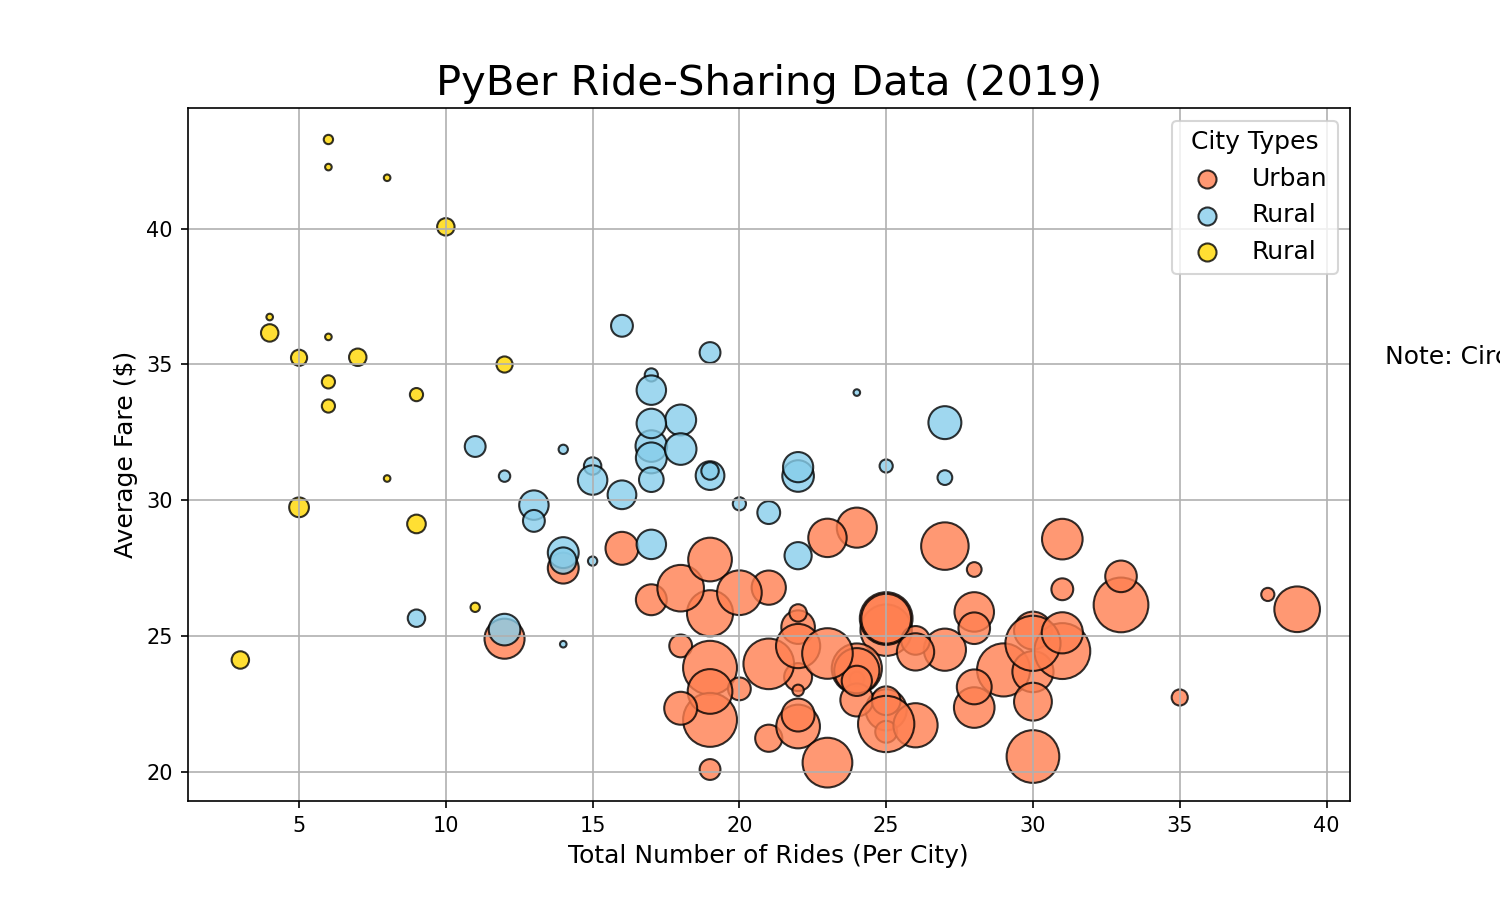

In [80]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
    urban_avg_fare, 
    s=urban_driver_count*10, c="coral", edgecolor="black", 
    linewidths=1, alpha=0.8, label = "Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

#Format legend
lgnd = plt.legend(fontsize=12, mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate text label about circles
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

#Save the figure
pyber_image = os.path.join("Analysis", "Fig1.png")
plt.savefig(pyber_image)